# Chapter 11 Flask App

#### Basics of Flask:

In [17]:
from flask import Flask, jsonify, request

In [2]:
app = Flask(__name__)

@app.route('/')
def get_welcome():
    return 'Hello Biotech World!'

@app.route('/api/echo/<value>')
def post_echo(value):
    return f"You entered '{value}'!"

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


#### Loading a Pretrained Scaler and Model:

In [1]:
import pickle
import numpy as np
import pandas as pd

In [2]:
loaded_gnb_clf = pickle.load(open("../../models/gnb_clf.pickle", 'rb'))

/Users/alkhalifas/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator GaussianNB from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [3]:
fieldLabels = ["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "smoothness_worst", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]

In [4]:
inputData = [11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300]

In [5]:
pd.DataFrame([inputData])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11.42,20.38,0.1425,0.2839,0.2414,0.2597,0.09744,0.4956,1.156,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.173


In [6]:
inputDataDF = pd.DataFrame([inputData])
inputDataDF.columns = fieldLabels
inputDataDF

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,11.42,20.38,0.1425,0.2839,0.2414,0.2597,0.09744,0.4956,1.156,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.173


In [7]:
loaded_scaler = pickle.load(open("../../models/ch5_scaler.pickle", 'rb'))

ModuleNotFoundError: No module named 'sklearn.preprocessing.data'

In [8]:
scaledInputData = loaded_scaler.transform(inputDataDF)

NameError: name 'loaded_scaler' is not defined

In [11]:
scaledInputData

array([[-0.76452751,  0.25467585,  3.27908846,  3.43400337,  1.91840058,
         2.86876424,  4.95126388,  0.32657144, -0.10487163,  0.68579181,
         2.78348135,  0.82456191,  1.14564964,  4.75374167,  2.07601969,
         3.40038912,  3.99299042,  2.01551539,  6.05923896,  5.15403296]])

In [12]:
prediction = loaded_gnb_clf.predict(scaledInputData)
prediction

array(['M'], dtype='<U1')

In [15]:
loaded_scaler = pickle.load(open("../../models/ch5_scaler.pickle", 'rb'))
loaded_gnb_clf = pickle.load(open("../../models/gnb_clf.pickle", 'rb'))

def predict_diagnosis(inputData, scaler, model):
    """
    Function that takes a list of measurements, scales them, and returns a prediction
    """
    inputDataDF = pd.DataFrame([inputData])
    inputDataDF.columns = fieldLabels
    scaledInputData = scaler.transform(inputDataDF)
    prediction = model.predict(scaledInputData)
    return prediction[0]

In [16]:
inputData = [11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300]
fieldLabels = ["radius_mean", "texture_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se", "smoothness_worst", "compactness_worst", "concavity_worst", "symmetry_worst", "fractal_dimension_worst"]

predict_diagnosis(inputData, loaded_scaler, loaded_gnb_clf)

'M'

### Train Model with Less Input:

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../../datasets/dataset_wisc_sd.csv")
df = df.replace(r'\\n','', regex=True) 
df['concave points_worst'] = df['concave points_worst'].astype(float)
df = df.dropna()

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.50)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

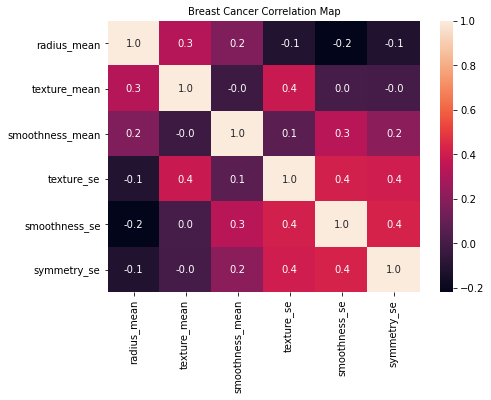

In [12]:
f,ax=plt.subplots(figsize = (7,5))
sns.heatmap(df.drop(columns=["id"]).corr(), annot= True, fmt = ".1f", ax=ax, annot_kws={"fontsize":10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Breast Cancer Correlation Map', fontsize=10)
plt.show()

In [13]:
X = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values

In [14]:
X.head()

,radius_mean,texture_mean,smoothness_mean,texture_se,smoothness_se,symmetry_se
0,17.99,10.38,0.11840,0.9053,0.006399,0.03003
1,20.57,17.77,0.08474,0.7339,0.005225,0.01389
2,19.69,21.25,0.10960,0.7869,0.006150,0.02250
3,11.42,20.38,0.14250,1.1560,0.009110,0.05963
4,20.29,14.34,0.10030,0.7813,0.011490,0.01756


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head()

,radius_mean,texture_mean,smoothness_mean,texture_se,smoothness_se,symmetry_se
0,1.095432,-2.071547,1.568265,-0.565868,-0.214823,1.158122
1,1.825827,-0.352468,-0.821208,-0.881045,-0.604835,-0.802463
2,1.576700,0.457057,0.943566,-0.783586,-0.297543,0.243425
3,-0.764528,0.254676,3.279088,-0.104872,0.685792,4.753742
4,1.746559,-1.150363,0.283373,-0.793884,1.476446,-0.356654


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=40)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc_clf = RandomForestClassifier(random_state=42, max_depth=4)
rfc_clf.fit(X_train, y_train)

rfc_pred = rfc_clf.predict(X_test)
print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           B       0.93      0.93      0.93        95
           M       0.85      0.85      0.85        46

    accuracy                           0.90       141
   macro avg       0.89      0.89      0.89       141
weighted avg       0.90      0.90      0.90       141



In [18]:
import pickle
pickle.dump(scaler, open("../../models/ch10_scaler.pickle", 'wb'))
pickle.dump(rfc_clf, open("../../models/ch10_rfc_clf.pickle", 'wb'))

In [19]:
from flask import Flask, jsonify, request
import json

loaded_scaler = pickle.load(open("../../models/ch10_scaler.pickle", 'rb'))
loaded_clf = pickle.load(open("../../models/ch10_rfc_clf.pickle", 'rb'))

app = Flask(__name__)

def predict_diagnosis(inputData, scaler, model):
    """
    Function that takes a list of measurements, scales them, and returns a prediction
    """
    inputDataDF = pd.DataFrame([inputData])
#     inputDataDF.columns = fieldLabels
    scaledInputData = scaler.transform(inputDataDF)
    prediction = model.predict(scaledInputData)
    return prediction[0]


@app.route('/')
def get_welcome():
    return 'Breast Cancer Diagnosis Prediction API'

@app.route('/api/predict/cancer', methods = ["POST"])
def post_echo():
    data_input = json.loads(request.data)
    input_features = data_input["text"]
#     print("data_input: ", data_input)
#     print("data_input.data: ", data_input["text"])
    prediction = predict_diagnosis(input_features, loaded_scaler, loaded_clf)
    
    return "Malignant" if prediction == "M" else "Benign"

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [20]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/alkhalifas/opt/anaconda3/lib/python3.8/site-packages
Requires: threadpoolctl, scipy, numpy, joblib
Required-by: sklearn, seqeval
